# Approximations for Spread Option Price
# ——Bachelier normal model,Kirk's approximation(1995) , Deng et al.(2008), MC and Quadrature Integration

## PART 0: Introduction of spread option

A spread option is a type of option where the payoff is based on the difference in price between two underlying assets. The payoff of European spread option at expiration date is:
#### $$Call:  max(S_1(T)-S_2(T)-K,0)$$
#### $$Put:  max(K-(S_1(T)-S_2(T),0))$$

where $S_1(T)$ and $S_2(T)$ are the spot price at maturity, $K$ is the strike price

## PART 1: normal model

Under the Bachelier model, the forward price of an underlying security $F_{T}$ follows an arithmetic Brownian motion with volatility $\sigma$.
$$dF_{T}=\sigma dW_{T}$$
The forward prices of call and put options, maturing at time T andstruck at K with the current forward price $F_{0}$ are:
$$Call: E[max(F_{T}-K,0)]=(F_{0}-K) N(d)+\sigma \sqrt T n(d)$$
$$Put:  E[max(K-F_{T},0)]=(K-F_{0}) N(-d)+\sigma \sqrt T n(-d)$$

In [2]:
import numpy as np
import scipy.stats as ss
import numpy.polynomial as nppoly
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
np.random.seed(1234567)

## PART 2: Kirk's approximation (1995)

### 2.2 Kirk's approximation

For $K\geq0$, $S_2^D(T)=S_2(T)+K$ is considered as a lognormal random variable.

The initial value of $S_2^D$ is given by $$S_2^D(0)=S_2(0)+Ke^{-rT}$$

The volatility of $S_2^D$ should be 'calibrated': $$\sigma_2^D=\frac{S_2(0)}{S_2(0)+Ke^{-rT}}\sigma_2$$
#### Let $S_2^D(0)$ replace $S_2(0)$ and $\sigma_2^D$ replace $\sigma_2$ in Margrabe's formula and we get:
#### $$C_K= S_1(0)N(d_K+\frac{1}{2}\sigma_K\sqrt{T})-(S_2(0)+Ke^{-rT})N(d_K-\frac{1}{2}\sigma_K\sqrt{T})$$
where $$d_K = \frac{log(S_1(0)/(S_2(0)+Ke^{-rT}))}{\sigma_K \sqrt{T}} $$

and $$\sigma_K = \sqrt{\sigma_1^2-2\rho\sigma_1\sigma_2\frac{S_2(0)}{S_2(0)+Ke^{-rT}}+\sigma_2^2\left.(\frac{S_2(0)}{S_2(0)+Ke^{-rT}}\right.)^2} $$
Parameters: 

$S_i(0)$: spot price of asset $i$ ($i=1,2$) at time 0; 

$K$: the strike price; 

$r$: risk-free rate

$T$: maturity time; 

$\sigma_i$: volatility of asset $i$ ($i=1,2$);

$\rho$: correlation coefficient of two assets

In [44]:
#Krik's method

def Kirk(strike, spot, vol, texp, corr, intr,cp):
    F = spot[1]/ (spot[1]+strike) 
    S = spot[0]/ (spot[1]+strike) 
    
    volk = vol[1]*F
    vol=np.sqrt(vol[0]**2+volk**2-2*corr*vol[0]*volk)
    
    d1=(np.log(S)+0.5*vol**2*texp)/(vol*np.sqrt(texp))
    d2=d1-vol*np.sqrt(texp)
    
    if cp == 'c':
        price = np.exp(-texp*intr)*(spot[0]*ss.norm.cdf(d1)-(spot[1]+strike)*ss.norm.cdf(d2))
    else:
        price = np.exp(-texp*intr)*(spot[0]*ss.norm.cdf(-d1)-(spot[1]+strike)*ss.norm.cdf(-d2))                                             
    return price

## PART 3: Deng et al.'s approximation (2008)

### 3.2 Deng's approximation

#### The idea behind Deng's approximation:
Considering the exercise boundary $x(y)$ (which is the same as $S_1(T)-S_2(T)-K=0$). Deng et al. study the monotonicity and convexity properties of it and the conditional moneyness function $A(y)$. Then they find that:

Let $K>0$ and $|\rho|<1$, the exercise boundary $x(y)$ is an increasing and convex function of $y$, and the conditional moneyness $A(y)$ is a concave function of y.

Then Deng et al. proposes a closed-form formula based on a quadratic approximation of the exercise boundary.

#### The formula:

Let $K>0$ and $|\rho|<1$. Let $y_0$ be any real number close to 0. The spread option price $\Pi$ under the general jointly-normal returns setup is given by

$$\Pi = e^{\frac{v_1^2}{2}+\mu_1-rT}I_1-e^{\frac{v_2^2}{2}+\mu_2-rT}I_2-Ke^{-rT}I_3$$

The formula above is the same as 3.1, but the integrals $I_i$'s are approximated to second order in $\epsilon$ as

#### $$I_i\approx J_0(C^i,D^i)+J_1(C^i,D^i)\epsilon+\frac{1}{2}J_2(C^i,D^i)\epsilon^2$$

where the function $J_i$'s are defined as

$$J_0(u,v)=N(\frac{u}{\sqrt{1+v^2}})$$

$$J_1(u,v)=\frac{1+(1+u^2)v^2}{(1+v^2)^{5/2}}n(\frac{u}{\sqrt{1+v^2}})$$

$$J_2(u,v)=\frac{(6-6u^2)v^2+(21-2u^2-u^4)v^4+4(3+u^2)v^6-3}{(1+v^2)^{11/2}}u*n(\frac{u}{\sqrt{1+v^2}})$$
and the arguments $C^i$,$D^i$ and $\epsilon$ are given by

$$C^1=C^3+D^3\rho\upsilon+\epsilon\rho^2\upsilon_1^2+\sqrt{1-\rho^2}\upsilon_1$$

$$D^1=D^3+2\rho\upsilon_1\epsilon$$

$$C^2=C^3+D^3\upsilon_2+\epsilon\upsilon_2^2$$

$$D^2=D^3+2\upsilon_2\epsilon$$

$$C^3=\frac{1}{\upsilon\sqrt{1-\rho^2}}(\mu_1-log(R+K)+\frac{\upsilon_2R}{R+K}y_0-\frac{1}{2}\frac{\upsilon_2^2RK}{(R+K)^2}y_0^2)$$

$$D^3=\frac{1}{\upsilon\sqrt{1-\rho^2}}(\rho\upsilon_1-\frac{\upsilon_2R}{R+K}+\frac{\upsilon_2^2RK}{(R+K)^2}y_0)$$

$$\epsilon=-\frac{1}{2\upsilon_1\sqrt{1-\rho^2}}\frac{\upsilon_2^2RK}{(R+K)^2}$$

with $$R=e^{\upsilon_2*y_0+\mu_2}$$

In [4]:
def I_func(u, v, epsilon):
    temp = u/np.sqrt(1+v**2)
    J0 = ss.norm.cdf(temp)
    J1_pdf = (1+(1+u**2)*v**2)/(1+v**2)**2.5
    J2_pdf = ((6-6*u**2)*v**2 + (21-2*u**2-u**4)*v**4 + 4*(3+u**2)*v**6-3)*u/(1+v**2)**5.5
    I = J0  + ss.norm.pdf(temp)*epsilon*( J1_pdf + 0.5*J2_pdf*epsilon )
    return I

def Deng_GBM(strike, spot, vol, texp, corr, intr,y0):
    rho_c = np.sqrt(1-corr*corr)
    u = np.log(spot)+(intr-np.array(vol)**2/2)*texp
    v = np.array(vol)*np.sqrt(texp)
    R = np.exp(u[1]+v[1]*y0)
    epsilon = -v[1]**2*R*strike/(2*v[0]*rho_c*(R+strike)**2)
    D3 = (corr*v[0]-v[1]*R/(R+strike)+v[1]**2*R*strike*y0/(R+strike)**2)/(v[0]*rho_c)
    C3 = (u[0]-np.log(R+strike)+v[1]*R*y0/(R+strike)-0.5*v[1]**2*R*strike*y0**2/(R+strike)**2)/(v[0]*rho_c)
    D2 = D3+2*v[1]*epsilon
    C2 = C3+D3*v[1]+epsilon*v[1]**2
    D1 = D3+2*corr*v[0]*epsilon
    C1 = C3+D3*corr*v[0] + epsilon*corr**2*v[0]**2 + rho_c*v[0]
    I1 = I_func(C1, D1, epsilon)
    I2 = I_func(C2, D2, epsilon)
    I3 = I_func(C3, D3, epsilon)
    price = np.exp(0.5*v[0]**2+u[0]-intr*texp)*I1-np.exp(0.5*v[1]**2+u[1]-intr*texp)*I2-strike*np.exp(-intr*texp)*I3
    return price

def Deng_logOU(texp, intr, lamb, yita, rho, vol, spot, strike, y0):
    u = np.array(yita)-0.5*np.array(vol)**2/np.array(lamb)+np.exp(-np.array(lamb)*texp)*(np.log(spot)-np.array(yita)+0.5*np.array(vol)**2/np.array(lamb))
    v = np.array(vol)*np.sqrt(0.5*(1-np.exp(-2*lamb*texp))/np.array(lamb))
    rho = 2*rho*np.sqrt(lamb[0]*lamb[1])*(1-np.exp(-lamb[0]*texp-lamb[1]*texp))/((lamb[0]+lamb[1])*np.sqrt(1-np.exp(-2*lamb[0]*texp))*np.sqrt(1-np.exp(-2*lamb[1]*texp)))
    R = np.exp(u[1]+v[1]*y0)
    epsilon = -v[1]**2*R*strike/(2*v[0]*np.sqrt(1-rho**2)*(R+strike)**2)
    D3 = (rho*v[0]-v[1]*R/(R+strike)+v[1]**2*R*strike*y0/(R+strike)**2)/(v[0]*np.sqrt(1-rho**2))
    C3 = (u[0]-np.log(R+strike)+v[1]*R*y0/(R+strike)-0.5*v[1]**2*R*strike*y0**2/(R+strike)**2)/(v[0]*np.sqrt(1-rho**2))
    D2 = D3+2*v[1]*epsilon
    C2 = C3+D3*v[1]+epsilon*v[1]**2
    D1 = D3+2*rho*v[0]*epsilon
    C1 = C3+D3*rho*v[0]+epsilon*rho**2*v[0]**2+np.sqrt(1-rho**2)*v[0]
    I1 = I_func(C1, D1, epsilon)
    I2 = I_func(C2, D2, epsilon)
    I3 = I_func(C3, D3, epsilon)
    price = np.exp(0.5*v[0]**2+u[0]-intr*texp)*I1-np.exp(0.5*v[1]**2+u[1]-intr*texp)*I2-strike*np.exp(-intr*texp)*I3
    return price

## PART 4: MC

In [5]:
#MC method
def spread_mc(strike, spot, vol, texp, corr, t, intr):
    call=[]
    vol1=vol[0]
    vol2=vol[1]
    
    for i in range(t):
        dw1=np.random.normal()
        dw2=corr*dw1+np.sqrt(1-corr**2)*np.random.normal()
        stockp1=spot[0]*np.exp((texp*(intr-0.5*vol1**2))+vol1*np.sqrt(texp)*dw1)
        stockp2=spot[1]*np.exp((texp*(intr-0.5*vol2**2))+vol2*np.sqrt(texp)*dw2)
        #BS Formula
        call.append(np.max([stockp1-stockp2-strike,0]))
    
    call_mean=np.mean(call)*np.exp(-texp*intr)
    
    return call_mean    

## PART 5: Quadrature Integration-Choi(2017)

Ref: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2913048


Assume that the asset prices, $S_k$ for $1\le k\le N$, follow the crrelated GBMs under the risk-neutral measure: $$\frac{dS_k(t)}{S_k(t)} = (r-q_k)dt+\sigma_kdW_k(t),$$
$\sigma_k$ -- volatility<br>$q_k$ -- dividend rate<br>$r$ -- risk-free rate<br>$W_k(t)$-standard Brownian motion, $dW_k(t)dW_j(t)=\rho_{kj} dt$

The payoff of a vanilla call option with the strike price $K$ is as follows:$$ $$$$\left(\sum_{k=1}^N \omega_kS_k(t_k)-K \right)^+.$$
Under the BSM model, the log prices, $logS_k(t_k)$, follow correlated normal distributions, with the covariance matrix $\mathbf\Sigma$ given as:$$ $$$$\Sigma_{kj}=\rho_{kj}\sigma_k\sigma_jmin(t_k,t_j).$$
Let $\mathbf V$ satisfy $\mathbf V \mathbf V^T=\mathbf \Sigma$, the T-forward value of the observation $S_k(t_k)$can be decorrelated to:$$ $$$$S_k(t_k)e^{r(T-t_k)}\overset{d}{=}F_kexp\left( -\frac{1}{2}\Sigma_{kk}+V_{k*}\mathbf z\right),$$
$\mathbf z$ -- a vector of independent standard normal RVs<br>$F_k=S_k(0)e^{rT-q_kt_k}$ -- T-forward price observed at $t = 0$<br>$\overset{d}{=}$ -- equtility in distribution law
The forward value of the call option price becomes an $N$-dimensional integration:$$ $$$$C=\int_\mathbf z\left(\sum_k\omega_kF_kexp(-\frac{1}{2}\Sigma_{kk}+\mathbf V_{k*}\mathbf z)-K\right)^+n(\mathbf z)\,d\mathbf z$$
$n(\mathbf z)$ -- the multivariate standard normal PDF
In the quadrature integration with GHQ method, the node size of the $j$-dimension, $M_j$, is determined by the following rule:$$ $$$$M_j=\left [ \frac{\left|\ \mathbf V_{*j}\ \ \right|}{\left|\ \mathbf g^T \mathbf V_{*1}\ \ \right|}\lambda +1 \right]\quad for\quad j\ge 2$$

In [4]:
#normalized forward-adjusted weight vector
def g_func(weight,forward_price):
    gg = weight*forward_price/np.linalg.norm(weight*forward_price)
    return gg


# generate V matrix
def V_func(dimension, weight, forward_price, cov_matrix):
    C = np.linalg.cholesky(cov_matrix)
    ggg = g_func(weight, forward_price)
    
    #equation 22，generate Q_1 and V_1
    Q_1 = C.T@ggg/np.sqrt(ggg@cov_matrix@ggg)  #in py, this is a row vector
    V_1 = C@Q_1
    V_1.shape = (dimension,1)

    #obtain full V
    e1 = np.zeros(dimension)
    e1[0] = 1
    v = (Q_1-e1)/np.linalg.norm(Q_1-e1)
    v.shape=(dimension,1)
    R = np.eye(dimension)-2*v@v.T

    #singular value decomposition
    U,D,Q = np.linalg.svd(C@R[:,1:],full_matrices=False)

    V = np.hstack((V_1,U@np.diag(D)))
    
    return V


# Generate degree vector
def degree_func(dimension, weight, forward_price, cov_matrix, lambd):
    V = V_func(dimension, weight, forward_price, cov_matrix)
    g = g_func(weight, forward_price)
    
    denorminator = np.linalg.norm(g.T@V[:,0])
    
    degreee = []
    for i in range(1,dimension):
        numerator = np.linalg.norm(V[:,i])
        Mj = round(numerator/denorminator*lambd+1)
        degreee.append(Mj)
    
    return degreee


# assign coordinate to each point
def coordinate(dimension, weight, forward_price, cov_matrix, lambd):
    
    degree = [int(x) for x in degree_func(dimension, weight, forward_price, cov_matrix, lambd)]
    number = int(np.prod(degree))
    
    def index_n(ind, bases=np.array([10])):
        powers = np.cumprod(np.insert(bases,0,1))
        ind_n = np.floor_divide(np.remainder(ind, powers[1:]), powers[:-1] )
        return ind_n
    
    indexxx = []
    for ind in range(number):
        indexxx.append(index_n(ind, bases=degree))
    
    indexxx = np.array(indexxx)
    #column = np.zeros((125,1))
    column = np.zeros((number,1))
    indexxx = np.column_stack((column,indexxx))
    
    return indexxx


# generate GHQ points and weights according to degree
def GHQ_pw(dimension, weight, forward_price, cov_matrix, lambd):
    
    degree = degree_func(dimension, weight, forward_price, cov_matrix, lambd)
    
    x_dic = {}
    w_dic = {}
    for k in range(dimension-1):
        a , b = nppoly.hermite_e.hermegauss(int(degree[k]))
        x_dic['%d'%k] = a
        w_dic['%d'%k] = b
    
    ghq_points = list(x_dic.values())
    ghq_weights = list(w_dic.values())
    
    return ghq_points,ghq_weights


#generate equation 7, f_k
def coeff_func(dimension, weight, forward_price, cov_matrix, point,k):
    V = V_func(dimension, weight, forward_price, cov_matrix)
    #z = point
    z = np.insert(point,0,0)
    return np.exp(-0.5*sum(V[k,:]**2)+V[k,:]@np.array(z).T)


#point that z1 = -dz.dot, according to euqation 20
def unitroot_func(dimension,weight,forward_price,cov_matrix,point,strike):
    z = np.insert(point,0,0)
    gg = weight*forward_price
    VV = V_func(dimension, weight, forward_price, cov_matrix)
    
    uu = []
    for k in range(dimension):
        #print(gg[k],VV[k,:],z)
        uu.append(gg[k]*VV[k,:]@z)
    
    uu_sum = sum(uu)
    
    z1 = (strike-sum(gg)-uu_sum)/(gg@VV[:,0])
    return z1


#formular 9, price of bs, with input of z_dot
def price_bs_func(dimension, weight, forward_price, cov_matrix, point,strike):
    gg = weight*forward_price
    dz_dot = -unitroot_func(dimension, weight, forward_price, cov_matrix, point,strike)
    V = V_func(dimension, weight, forward_price,cov_matrix)
    
    summ2 = []
    for k in range(dimension):
        co_f_k = coeff_func(dimension, weight, forward_price, cov_matrix, point, k)
        e2 = gg[k]*co_f_k*ss.norm.cdf(dz_dot+V[k,0])
        summ2.append(e2)
        
    price = sum(summ2)-strike*ss.norm.cdf(dz_dot)
    return(price)


# basket option price accoding to choi2017 model
def price_choi2017(dimension, weight, forward_price, cov_matrix, lambd, strike):
    point_coords = coordinate(dimension, weight, forward_price, cov_matrix, lambd)
    x,w = GHQ_pw(dimension, weight, forward_price, cov_matrix, lambd)
    
    weight_sum = []
    for k in point_coords:
        c = []
        d = []
        for s in range(dimension-1):
            c.append(x[s][int(k[s])])
            d.append(w[s][int(k[s])])
        
        point_value = np.prod(d)*price_bs_func(dimension, weight, forward_price, cov_matrix, point = c,strike = strike)
        weight_sum.append(point_value)
    
    summ = np.sum(weight_sum)
    
    return summ

## PART 6: Comparsion  Kirk , Deng et al. MC and Choi

Call spread option: $S_1(0) = 72.64$, $S_2(0) = 71.01$, $K = 0.5$, $r=0.03$, $T = 0.06$, $\sigma_1 = 0.2955, \sigma_2 = 0.2808$, $\rho = 0.998$, $q_1 = q_2 = 1$

In [42]:
#Test1:choose different initial parameters(Spot,vol,divr,intr,corr/rho,texp,strik),3 methods' results are converged
results=np.ones(3)
spot = np.array([72.64, 71.01])
vol = np.array([0.2955, 0.2808]) # sd
intr = 0.03
corr=0.998
texp = 0.06
strike = 0.5
t=1000
y0=0
results[0]=Kirk(strike, spot, vol, texp, corr, intr,"c")# option price by K method
results[1]=Deng_GBM(strike, spot, vol, texp, corr, intr,y0) # option price by Deng et al. method
results[2]=spread_mc(strike, spot, vol, texp, corr, t, intr) #option price by MC method
print(results)

[1.12860877 1.13155514 1.12318845]


### 4.2 Scenario 1(Changing strike price)
For call option, set $S_1(0) = 72.64$, $S_2(0) = 71.01$, $K = 0.5$, $r=0.03$, $T = 0.06$, $\sigma_1 = 0.2955, \sigma_2 = 0.2808$, $\rho = 0.998$. 

In [66]:
Mc_result = []
spot = np.array([72.64, 71.01])
vol = np.array([0.2955, 0.2808])
intr = 0.03
texp = 0.06
strike = np.arange(0,4.1,0.4)
corr = 0.998
y0 = 0
t = 1000
call_strike_Deng= Deng_GBM(strike, spot, vol, texp, corr, intr,y0) # option price by Deng et al. method
call_strike_Kirk = Kirk(strike, spot, vol, texp, corr, intr,"c")# option price by K method
for i in strike:
    Mc_result.append(spread_mc(i, spot, vol, texp, corr, t, intr))
call_strike_mc = np.asarray(Mc_result)

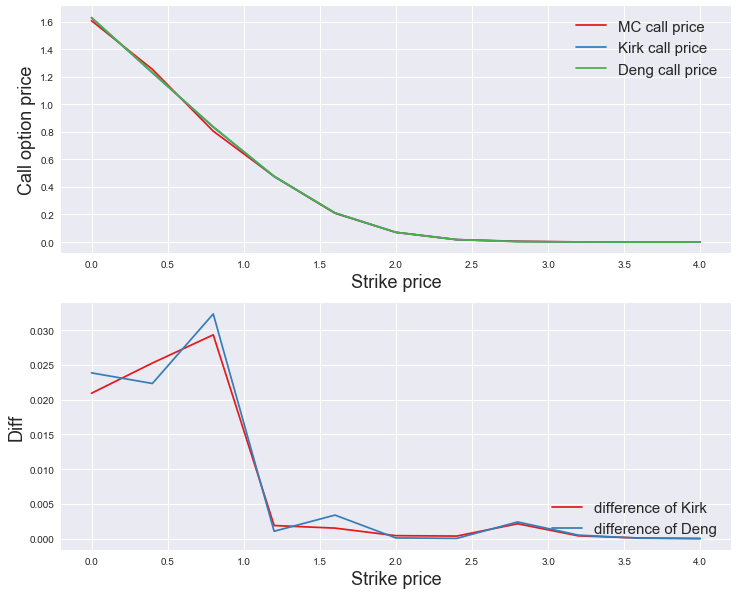

In [72]:
sns.set(rc = {"figure.figsize":(12,10)})
sns.set_palette(sns.color_palette("Set1"))

# plt.style.use("Splarize_Light2") #financial times style

# set figure size and style

# plt.figure(figsize=(15,12))

# plt.style.use("fivethirtyeight") 


# plot1
plt.subplot(2,1,1)
plt.plot(strike,call_strike_mc,label='MC call price')
plt.plot(strike,call_strike_Kirk,label='Kirk call price')
plt.plot(strike,call_strike_Deng,label='Deng call price')
plt.legend(loc='upper right',fontsize =15)
plt.xlabel('Strike price',fontsize =18)
plt.ylabel('Call option price',fontsize =18)

# plot2
plt.subplot(2,1,2)
strike_diff_Kirk = abs(call_strike_Kirk-call_strike_mc)
strike_diff_Deng = abs(call_strike_Deng-call_strike_mc)
plt.plot(strike,strike_diff_Kirk,label='difference of Kirk')
plt.plot(strike,strike_diff_Deng,label='difference of Deng')
plt.legend(loc='lower right',fontsize =15)
plt.xlabel('Strike price',fontsize =18)
plt.ylabel('Diff',fontsize =18)
plt.show()

### 4.3 Scenario 2(Changing correlation coefficients)
For call option, set $S_1(0) = 72.64$, $S_2(0) = 71.01$, $K = 0.5$, $r=0.03$, $T = 0.06$, $\sigma_1 = 0.2955, \sigma_2 = 0.2808$, $\rho = 0.998$

In [68]:
Mc = []
spot = np.array([72.64, 71.01])
vol = np.array([0.2955, 0.2808])
intr = 0.03
texp = 1
strike = 0.5
corr = np.arange(-0.9,1.0,0.2)
y0 = 0
call_rho_Deng = Deng_GBM(strike, spot, vol, texp, corr, intr,y0) 
call_rho_Kirk = Kirk(strike, spot, vol, texp, corr, intr,"c")
for i in corr:
    Mc.append(spread_mc(strike, spot, vol, texp, i, t, intr))
call_rho_mc = np.asarray(Mc)

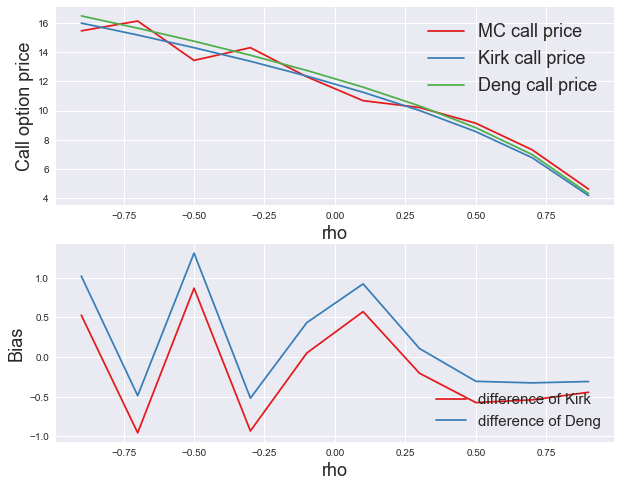

In [69]:
plt.figure(figsize=(10,8))
#plot1
plt.subplot(2,1,1)
plt.plot(corr,call_rho_mc,label='MC call price')
plt.plot(corr,call_rho_Kirk,label='Kirk call price')
plt.plot(corr,call_rho_Deng,label='Deng call price')
plt.legend(loc='upper right',fontsize =18)
plt.xlabel('rho',fontsize =18)
plt.ylabel('Call option price',fontsize =18)

# plot2
plt.subplot(2,1,2)
rho_diff_Kirk = call_rho_Kirk-call_rho_mc
rho_diff_Deng = call_rho_Deng-call_rho_mc
plt.plot(corr,rho_diff_Kirk,label='difference of Kirk')
plt.plot(corr,rho_diff_Deng,label='difference of Deng')
plt.legend(loc='lower right',fontsize =15)
plt.xlabel('rho',fontsize =18)
plt.ylabel('Bias',fontsize =18)
plt.show()

## PART 6: Research for better $y_0$ for Deng et al.'s approximation

### Finding the best y0 in Scenario 1(Changing strike price)
For call option, set $S_1(0) = 72.64$, $S_2(0) = 71.01$, $K = 0.5$, $r=0.03$, $T = 0.06$, $\sigma_1 = 0.2955, \sigma_2 = 0.2808$, $\rho = 0.998$

The best y0 of all the strike is 0


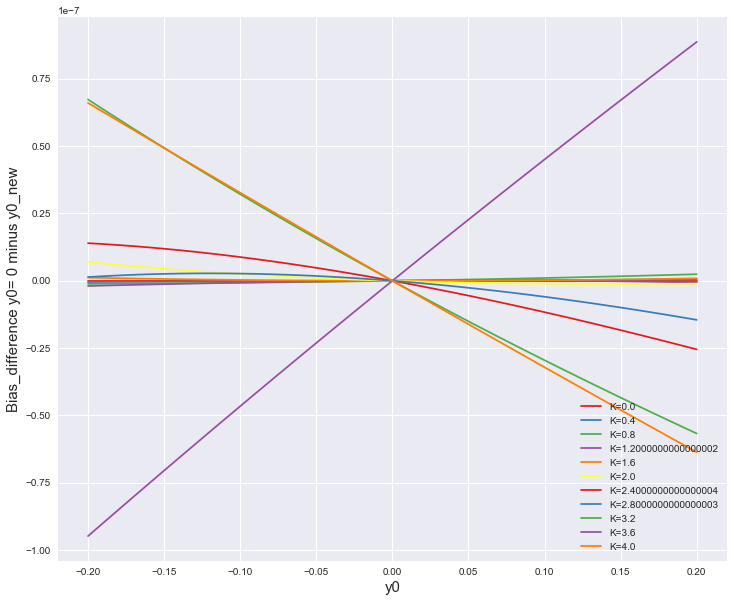

In [77]:
spot = np.array([72.64, 71.01])
vol = np.array([0.2955, 0.2808])
intr = 0.03
texp = 0.06
strike = np.arange(0,4.1,0.4)
corr = 0.998

y0_pic = np.arange(-0.2,0.21,0.01)
y0_out = []
Mc=[]
Deng_diff_12 = []
for i in range(len(strike)):
    Mc.append(spread_mc(strike[i], spot, vol, texp, corr, t, intr))
call_rho_mc = np.asarray(Mc)

plt.figure(figsize=(12,10))
for i in range(len(strike)):
    y0 = np.arange(-0.2,0.21,0.01)
    Deng_diff_y0 = np.abs(Deng_GBM(strike[i], spot, vol, texp, corr, intr,y0=0)-call_rho_mc[i]) 
        
    Deng_diff_new = np.abs(Deng_GBM(strike[i], spot, vol, texp, corr, intr,y0)-call_rho_mc[i])
    y01 = y0
    y01[Deng_diff_new>=Deng_diff_y0]=0
    y0_out.append(y01)
    Deng_diff_12.append(Deng_diff_y0 - Deng_diff_new)
    plt.figure(1)
    plt.plot(y0_pic,Deng_diff_12[i],label='K='+str(strike[i]))
    plt.legend(loc='lower right')
    plt.xlabel('y0',fontsize = 15)
    plt.ylabel('Bias_difference y0= 0 minus y0_new',fontsize = 15)
    plt.grid(True)
y_best = y0[np.prod(y0_out, axis=0)!=0]
if len(y_best)==0:
    print("The best y0 of all the strike is",0)
else:
    print("The best y0 of all the strike is",y_best)

### Finding the best y0 in Scenario 2(Changing correlation coefficients)
For call option, set $S_1(0) = 72.64$, $S_2(0) = 71.01$, $K = 0.5$, $r=0.03$, $T = 0.06$, $\sigma_1 = 0.2955, \sigma_2 = 0.2808$, $\rho = 0.998$

The best y0 of all the rho is 
 []


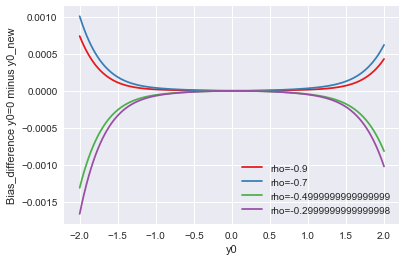

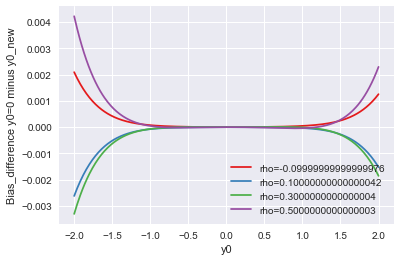

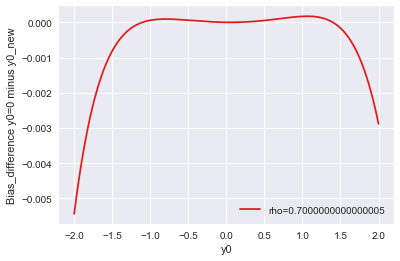

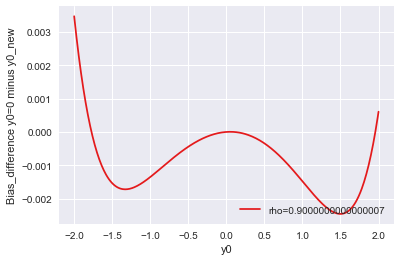

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [95]:
spot = np.array([200, 100])
vol = np.array([0.15, 0.3])
intr = 0.03
texp = 1
strike = 100
corr = np.arange(-0.9,1.0,0.2)

y0_pic = np.arange(-2,2.01,0.01)
y0_out=[]
Mc = []

Deng_diff_12 = []
k=1

for i in corr:
    Mc.append(spread_mc(strike, spot, vol, texp, i, t, intr))
call_rho_mc = np.asarray(Mc)

for i in range(len(corr)):
    y0 = np.arange(-2,2.01,0.01)
    Deng_diff_y0 = np.abs(Deng_GBM(strike, spot, vol, texp, corr[i], intr,y0=0)-call_rho_mc[i])
    Deng_diff_new = np.abs(Deng_GBM(strike, spot, vol, texp, corr[i], intr,y0)-call_rho_mc[i])
    Deng_diff_12.append(Deng_diff_y0 - Deng_diff_new)
    y01 = y0
    y01[Deng_diff_new>=Deng_diff_y0]=0
    y0_out.append(y01)
    plt.figure(figsize=(6,4))
    if i>=len(corr)-2 and i<len(corr)-1:
        plt.figure(3)
        plt.plot(y0_pic,Deng_diff_12[i],label='rho='+str(corr[i]))
        plt.legend(loc='lower right')
        plt.xlabel('y0')
        plt.ylabel('Bias_difference y0=0 minus y0_new')
        plt.grid(True)

    elif i>=len(corr)-6 and i<len(corr)-2:
        plt.figure(2)
        plt.plot(y0_pic,Deng_diff_12[i],label='rho='+str(corr[i]))
        plt.legend(loc='lower right')
        plt.xlabel('y0')
        plt.ylabel('Bias_difference y0=0 minus y0_new')
        plt.grid(True)

    elif i>=len(corr)-1:
        plt.figure(4)
        plt.plot(y0_pic,Deng_diff_12[i],label='rho='+str(corr[i]))
        plt.legend(loc='lower right')
        plt.xlabel('y0')
        plt.ylabel('Bias_difference y0=0 minus y0_new')
        plt.grid(True)

    else:
        plt.figure(1)
        plt.plot(y0_pic,Deng_diff_12[i],label='rho='+str(corr[i]))
        plt.legend(loc='lower right')
        plt.xlabel('y0')
        plt.ylabel('Bias_difference y0=0 minus y0_new')
        plt.grid(True)

y_best = y0[np.prod(y0_out, axis=0)!=0]
print("The best y0 of all the rho is \n",y_best)